In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('notebooks/data/metrics.csv')

metrics = ['CP', 'AA', 'FA', 'KC', 'SC', 'AD']
iterations = ['iter0', 'iter1', 'iter2', 'iter3', 'iter4', 'iter5', 'iter6', 'iter7']

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

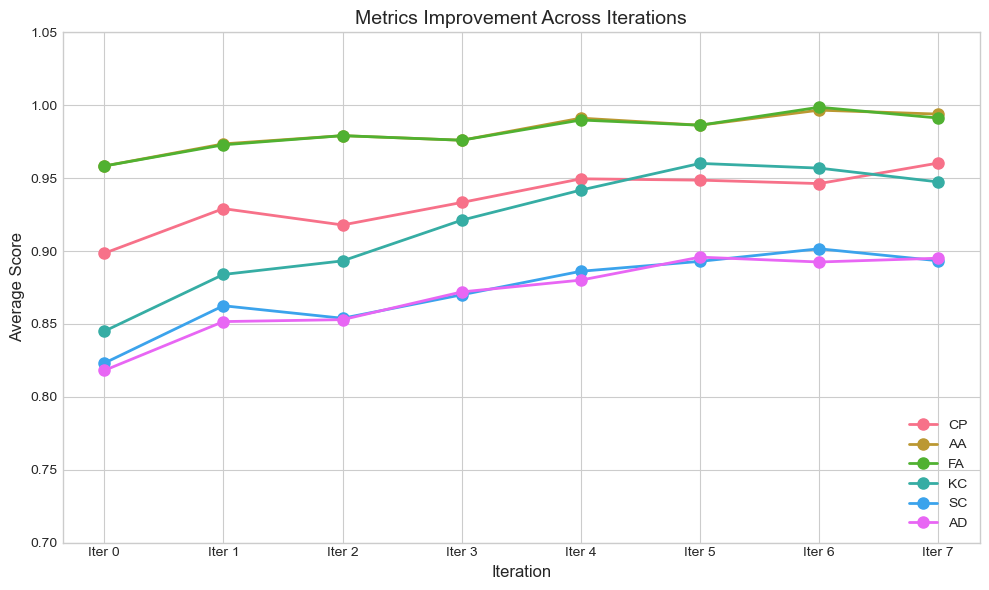

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))

for metric in metrics:
    means = [df[f'{iter}_{metric}'].mean() for iter in iterations]
    ax.plot(range(8), means, marker='o', linewidth=2, markersize=8, label=metric)

ax.set_xticks(range(8))
ax.set_xticklabels([f'Iter {i}' for i in range(8)])
ax.set_xlabel('Iteration', fontsize=12)
ax.set_ylabel('Average Score', fontsize=12)
ax.set_title('Metrics Improvement Across Iterations', fontsize=14)
ax.legend(loc='lower right')
ax.set_ylim(0.7, 1.05)
plt.tight_layout()
plt.show()

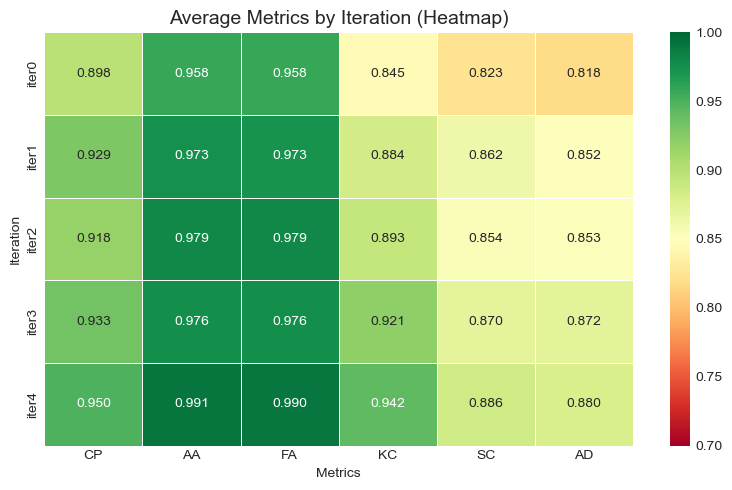

In [13]:

summary_data = []
for iter in iterations:
    row = {metric: df[f'{iter}_{metric}'].mean() for metric in metrics}
    summary_data.append(row)

summary_df = pd.DataFrame(summary_data, index=iterations)

fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(summary_df, annot=True, fmt='.3f', cmap='RdYlGn', 
            vmin=0.7, vmax=1.0, linewidths=0.5, ax=ax)
ax.set_title('Average Metrics by Iteration (Heatmap)', fontsize=14)
ax.set_xlabel('Metrics')
ax.set_ylabel('Iteration')
plt.tight_layout()
plt.show()

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('notebooks/data/metrics.csv')

metrics = ['CP', 'AA', 'FA', 'KC', 'SC', 'AD']
iterations = ['iter0', 'iter1', 'iter2', 'iter3', 'iter4']

best_iter_counts = {metric: {iter: 0 for iter in iterations} for metric in metrics}

for idx, row in df.iterrows():
    for metric in metrics:
        values = {iter: row.get(f'{iter}_{metric}', np.nan) for iter in iterations}
        max_val = max(v for v in values.values() if pd.notna(v))
        best_iters = [iter for iter, v in values.items() if v == max_val]
        for best_iter in best_iters:
            best_iter_counts[metric][best_iter] += 1

result_df = pd.DataFrame(best_iter_counts).T
print(result_df)
print()

total_articles = len(df)
result_pct = result_df / result_df.sum(axis=1).values.reshape(-1, 1) * 100
print(result_pct.round(1))

    iter0  iter1  iter2  iter3  iter4
CP     10     13     11     16     18
AA     27     30     26     28     30
FA     27     30     26     28     28
KC      9     13     12     13     22
SC      7     10     10      6     12
AD      9      9     13      8     13

    iter0  iter1  iter2  iter3  iter4
CP   14.7   19.1   16.2   23.5   26.5
AA   19.1   21.3   18.4   19.9   21.3
FA   19.4   21.6   18.7   20.1   20.1
KC   13.0   18.8   17.4   18.8   31.9
SC   15.6   22.2   22.2   13.3   26.7
AD   17.3   17.3   25.0   15.4   25.0


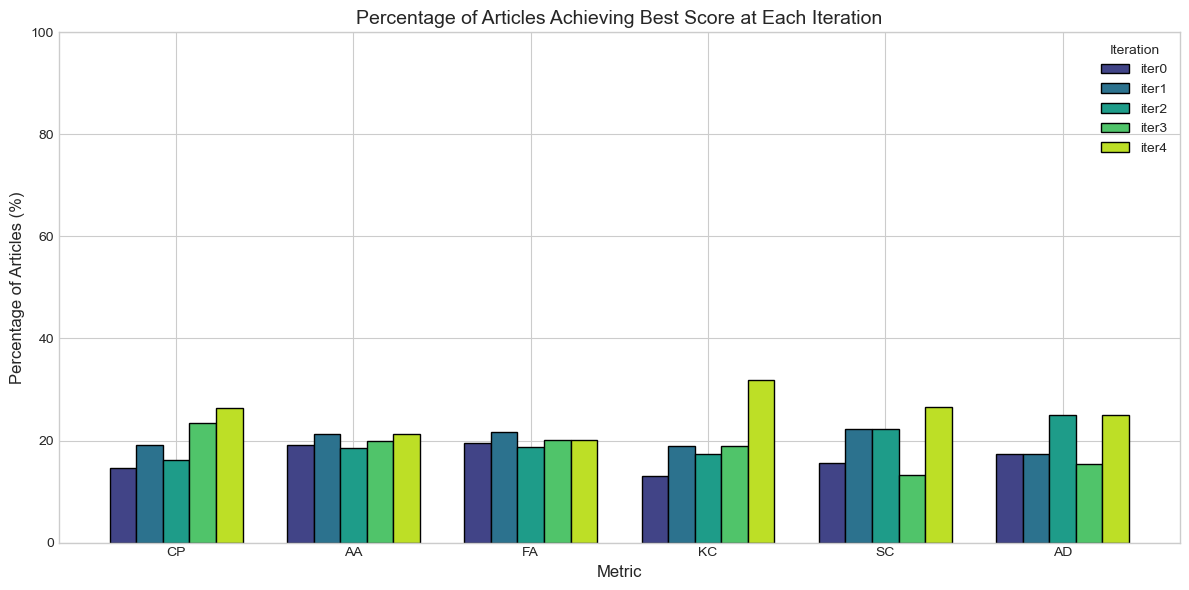

In [15]:
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(metrics))
width = 0.15
colors = plt.cm.viridis(np.linspace(0.2, 0.9, len(iterations)))

for i, iter in enumerate(iterations):
    counts = [best_iter_counts[metric][iter] for metric in metrics]
    pcts = [c / result_df.loc[metric].sum() * 100 for c, metric in zip(counts, metrics)]
    bars = ax.bar(x + i * width, pcts, width, label=iter, color=colors[i], edgecolor='black')

ax.set_xlabel('Metric', fontsize=12)
ax.set_ylabel('Percentage of Articles (%)', fontsize=12)
ax.set_title('Percentage of Articles Achieving Best Score at Each Iteration', fontsize=14)
ax.set_xticks(x + width * 2)
ax.set_xticklabels(metrics)
ax.legend(title='Iteration')
ax.set_ylim(0, 100)

plt.tight_layout()
plt.show()

In [16]:
summary = []
for metric in metrics:
    counts = best_iter_counts[metric]
    best_iter = max(counts, key=counts.get)
    best_count = counts[best_iter]
    total = sum(counts.values())
    summary.append({
        'Metric': metric,
        'Most Frequent Best Iter': best_iter,
        'Count': best_count,
        'Percentage': f'{best_count/total*100:.1f}%'
    })

summary_df = pd.DataFrame(summary)
print("Each metrics achive highest score in Iteration：")
print(summary_df.to_string(index=False))

Each metrics achive highest score in Iteration：
Metric Most Frequent Best Iter  Count Percentage
    CP                   iter4     18      26.5%
    AA                   iter1     30      21.3%
    FA                   iter1     30      21.6%
    KC                   iter4     22      31.9%
    SC                   iter4     12      26.7%
    AD                   iter2     13      25.0%
